<a href="https://colab.research.google.com/github/Tommy840602/SVM/blob/main/SVM_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [48]:
df = pd.read_csv("/content/pulsar_stars.csv")

In [49]:
#EDA
df.shape

(17898, 9)

In [50]:
df.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [51]:
df.columns = df.columns.str.strip()
col_names = df.columns
col_names

Index(['Mean of the integrated profile',
       'Standard deviation of the integrated profile',
       'Excess kurtosis of the integrated profile',
       'Skewness of the integrated profile', 'Mean of the DM-SNR curve',
       'Standard deviation of the DM-SNR curve',
       'Excess kurtosis of the DM-SNR curve', 'Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

In [52]:
df['target_class'].value_counts()

0    16259
1     1639
Name: target_class, dtype: int64

In [53]:
df['target_class'].value_counts()/float(len(df))

0    0.908426
1    0.091574
Name: target_class, dtype: float64

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Mean of the integrated profile                17898 non-null  float64
 1   Standard deviation of the integrated profile  17898 non-null  float64
 2   Excess kurtosis of the integrated profile     17898 non-null  float64
 3   Skewness of the integrated profile            17898 non-null  float64
 4   Mean of the DM-SNR curve                      17898 non-null  float64
 5   Standard deviation of the DM-SNR curve        17898 non-null  float64
 6   Excess kurtosis of the DM-SNR curve           17898 non-null  float64
 7   Skewness of the DM-SNR curve                  17898 non-null  float64
 8   target_class                                  17898 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


In [55]:
df.isnull().sum()

Mean of the integrated profile                  0
Standard deviation of the integrated profile    0
Excess kurtosis of the integrated profile       0
Skewness of the integrated profile              0
Mean of the DM-SNR curve                        0
Standard deviation of the DM-SNR curve          0
Excess kurtosis of the DM-SNR curve             0
Skewness of the DM-SNR curve                    0
target_class                                    0
dtype: int64

In [56]:
df.describe()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709,0.091574
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540,0.288432
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504,0.000000
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556,0.000000
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309330,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392141,110.642211,34.539844,1191.000837,1.000000


Text(0, 0.5, 'Skewness of the DM-SNR curve')

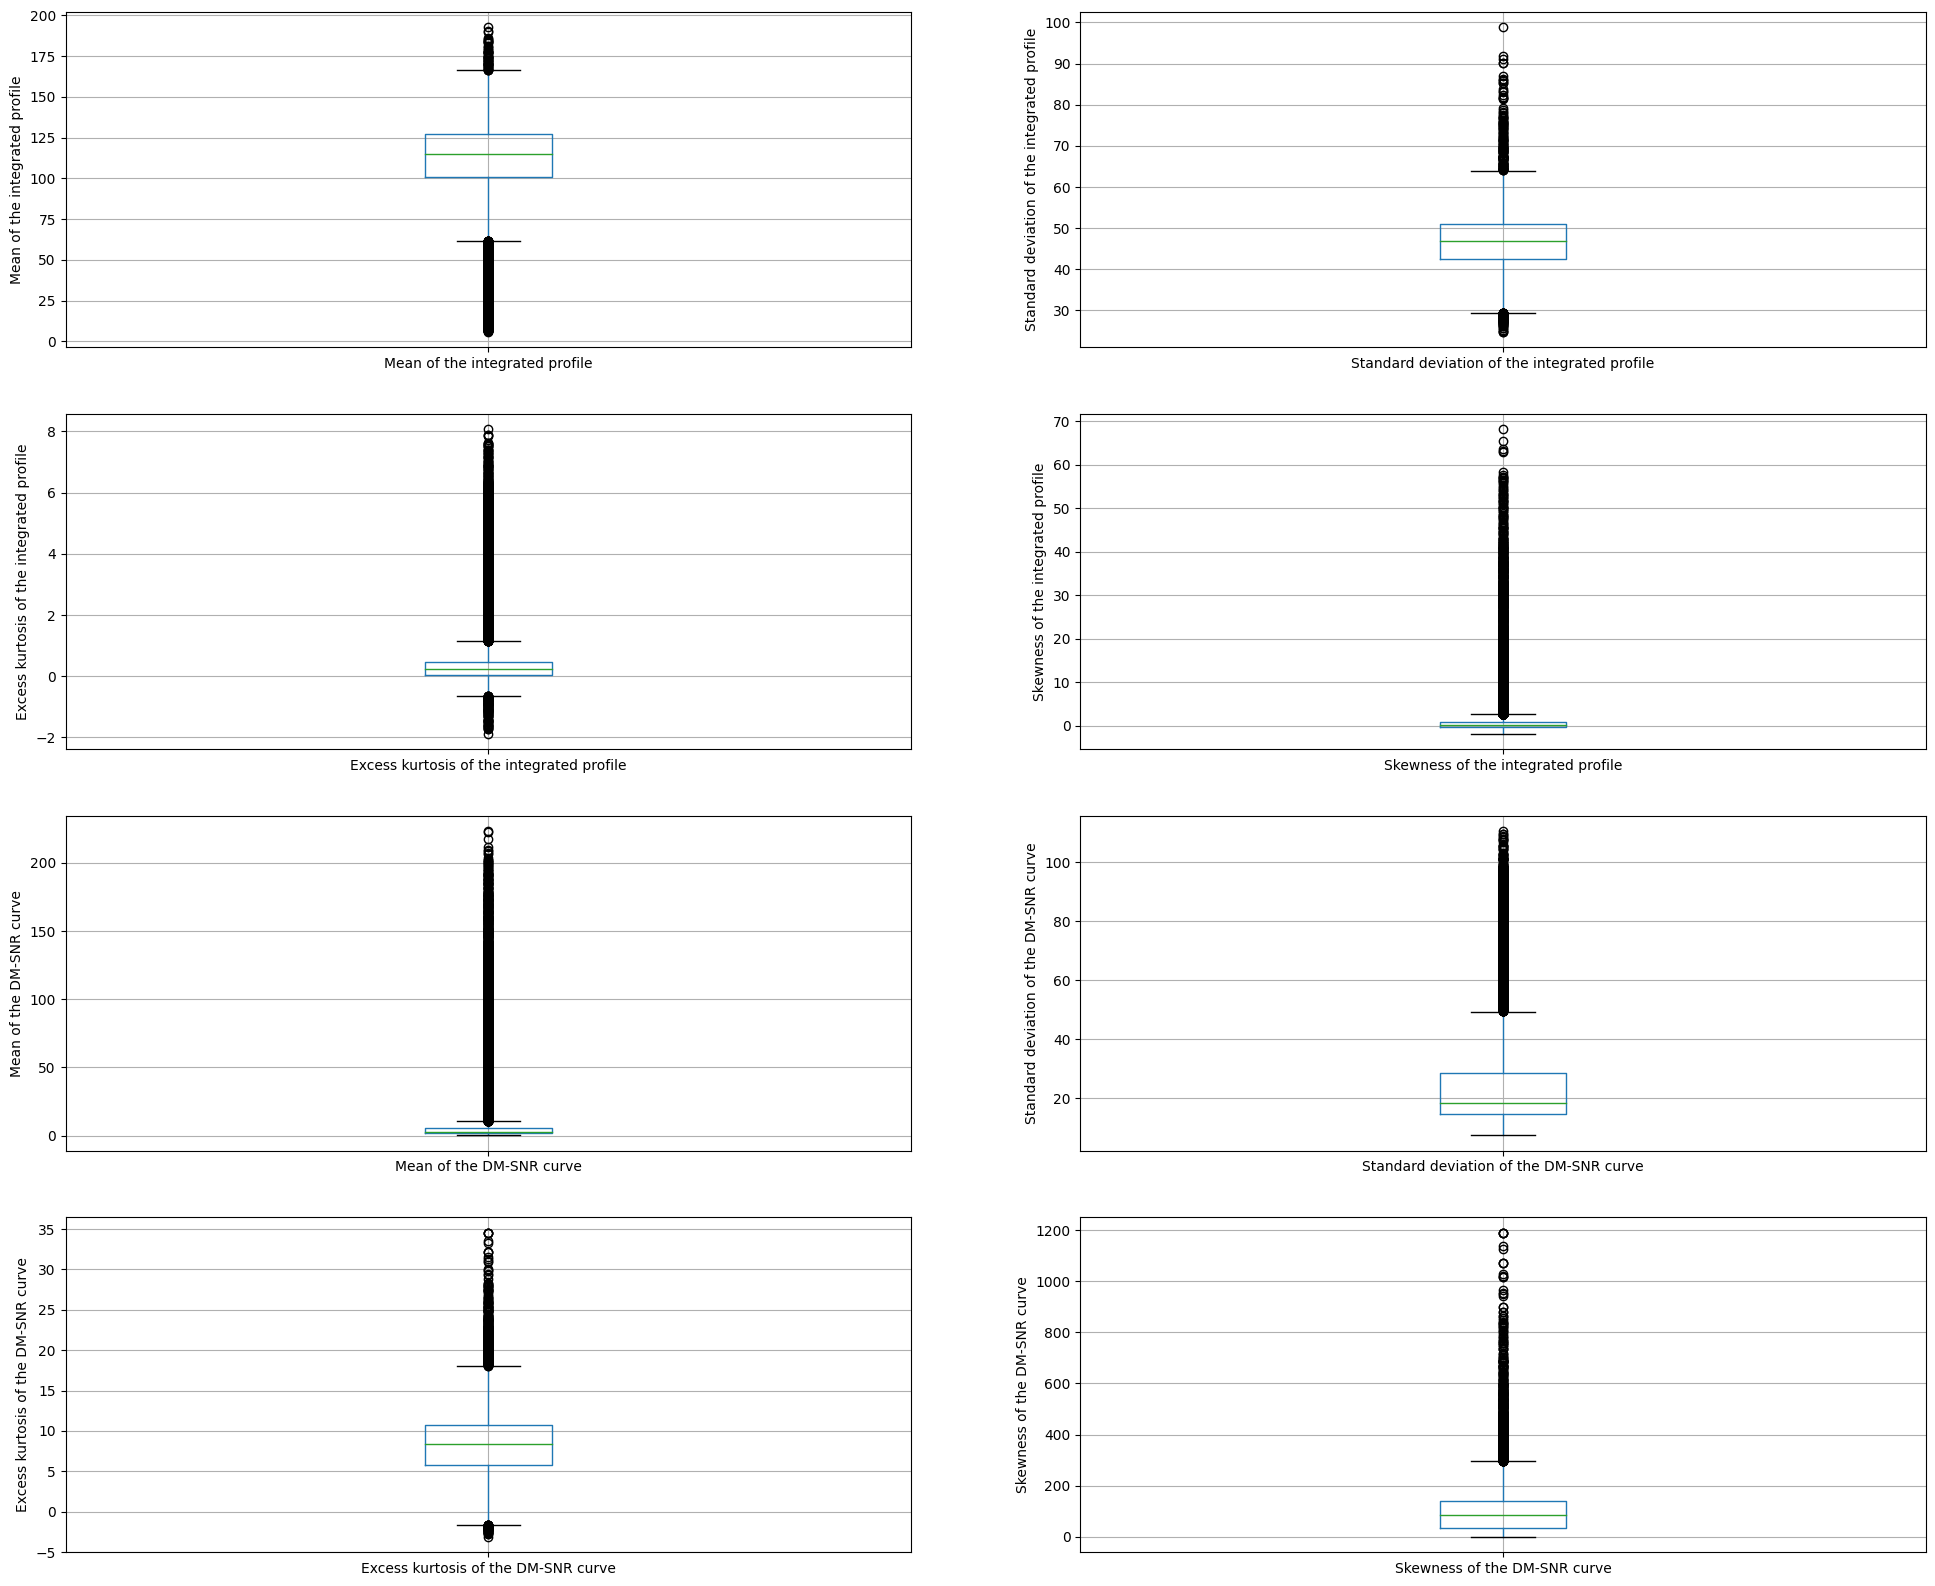

In [57]:
plt.figure(figsize=(24,20))


plt.subplot(4, 2, 1)
fig = df.boxplot(column='Mean of the integrated profile')
fig.set_title('')
fig.set_ylabel('Mean of the integrated profile')

plt.subplot(4, 2, 2)
fig = df.boxplot(column='Standard deviation of the integrated profile')
fig.set_title('')
fig.set_ylabel('Standard deviation of the integrated profile')

plt.subplot(4, 2, 3)
fig = df.boxplot(column='Excess kurtosis of the integrated profile')
fig.set_title('')
fig.set_ylabel('Excess kurtosis of the integrated profile')

plt.subplot(4, 2, 4)
fig = df.boxplot(column='Skewness of the integrated profile')
fig.set_title('')
fig.set_ylabel('Skewness of the integrated profile')

plt.subplot(4, 2, 5)
fig = df.boxplot(column='Mean of the DM-SNR curve')
fig.set_title('')
fig.set_ylabel('Mean of the DM-SNR curve')

plt.subplot(4, 2, 6)
fig = df.boxplot(column='Standard deviation of the DM-SNR curve')
fig.set_title('')
fig.set_ylabel('Standard deviation of the DM-SNR curve')

plt.subplot(4, 2, 7)
fig = df.boxplot(column='Excess kurtosis of the DM-SNR curve')
fig.set_title('')
fig.set_ylabel('Excess kurtosis of the DM-SNR curve')

plt.subplot(4, 2, 8)
fig = df.boxplot(column='Skewness of the DM-SNR curve')
fig.set_title('')
fig.set_ylabel('Skewness of the DM-SNR curve')

Text(0, 0.5, 'Number of pulsar stars')

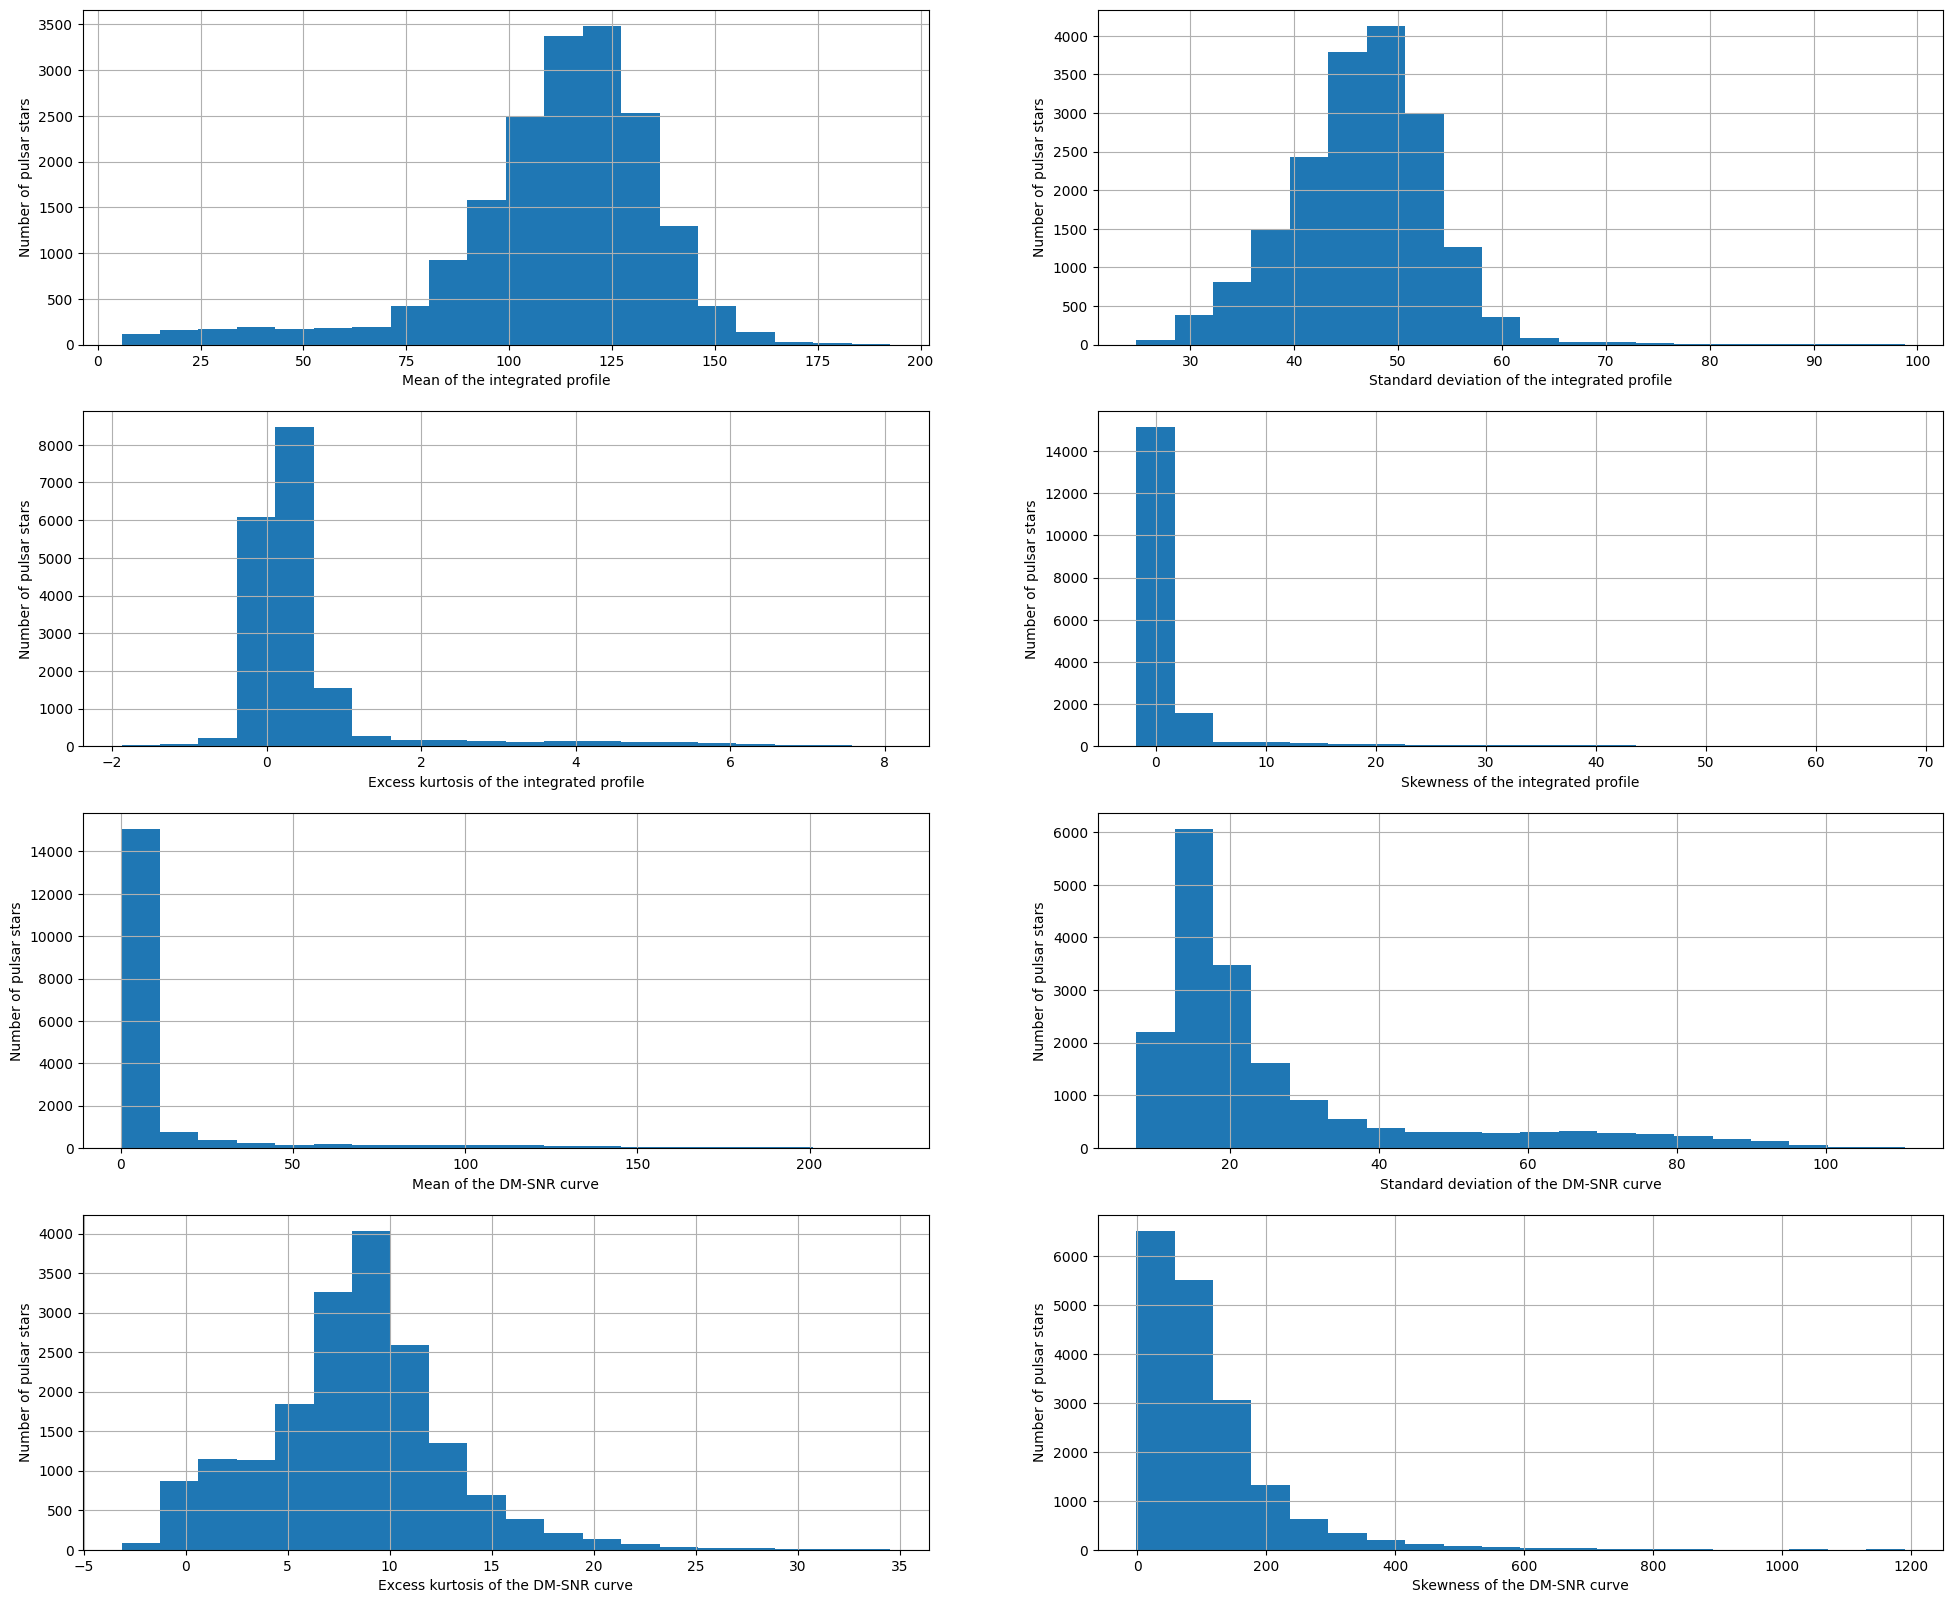

In [58]:
plt.figure(figsize=(24,20))

plt.subplot(4, 2, 1)
fig = df['Mean of the integrated profile'].hist(bins=20)
fig.set_xlabel('Mean of the integrated profile')
fig.set_ylabel('Number of pulsar stars')

plt.subplot(4, 2, 2)
fig = df['Standard deviation of the integrated profile'].hist(bins=20)
fig.set_xlabel('Standard deviation of the integrated profile')
fig.set_ylabel('Number of pulsar stars')

plt.subplot(4, 2, 3)
fig = df['Excess kurtosis of the integrated profile'].hist(bins=20)
fig.set_xlabel('Excess kurtosis of the integrated profile')
fig.set_ylabel('Number of pulsar stars')

plt.subplot(4, 2, 4)
fig = df['Skewness of the integrated profile'].hist(bins=20)
fig.set_xlabel('Skewness of the integrated profile')
fig.set_ylabel('Number of pulsar stars')

plt.subplot(4, 2, 5)
fig = df['Mean of the DM-SNR curve'].hist(bins=20)
fig.set_xlabel('Mean of the DM-SNR curve')
fig.set_ylabel('Number of pulsar stars')

plt.subplot(4, 2, 6)
fig = df['Standard deviation of the DM-SNR curve'].hist(bins=20)
fig.set_xlabel('Standard deviation of the DM-SNR curve')
fig.set_ylabel('Number of pulsar stars')

plt.subplot(4, 2, 7)
fig = df['Excess kurtosis of the DM-SNR curve'].hist(bins=20)
fig.set_xlabel('Excess kurtosis of the DM-SNR curve')
fig.set_ylabel('Number of pulsar stars')

plt.subplot(4, 2, 8)
fig = df['Skewness of the DM-SNR curve'].hist(bins=20)
fig.set_xlabel('Skewness of the DM-SNR curve')
fig.set_ylabel('Number of pulsar stars')

In [59]:
#Declare feature vector and target variable
X = df.drop(['target_class'], axis=1)
y = df['target_class']

In [60]:
#Split data into separate training and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [61]:
X_train.shape, X_test.shape

((14318, 8), (3580, 8))

In [62]:
#Feature Scaling
cols = X_train.columns
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [63]:
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])

In [64]:
X_train.describe()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve
count,1.431800e+04,1.431800e+04,1.431800e+04,1.431800e+04,1.431800e+04,1.431800e+04,1.431800e+04,1.431800e+04
mean,1.908113e-16,-6.550610e-16,1.042143e-17,3.870815e-17,-8.734147e-17,-1.617802e-16,-1.513588e-17,1.122785e-16
std,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00
min,-4.035499e+00,-3.181033e+00,-2.185946e+00,-5.744051e-01,-4.239001e-01,-9.733707e-01,-2.455649e+00,-1.003411e+00
25%,-3.896291e-01,-6.069473e-01,-4.256221e-01,-3.188054e-01,-3.664918e-01,-6.125457e-01,-5.641035e-01,-6.627590e-01
50%,1.587461e-01,5.846646e-02,-2.453172e-01,-2.578142e-01,-3.372294e-01,-4.067482e-01,3.170446e-02,-2.059136e-01
75%,6.267059e-01,6.501017e-01,-1.001238e-02,-1.419621e-01,-2.463724e-01,1.078934e-01,5.362759e-01,3.256217e-01
max,3.151882e+00,7.621116e+00,7.008906e+00,1.054430e+01,7.025568e+00,4.292181e+00,5.818557e+00,1.024613e+01


In [65]:
#Run SVM with rbf kernel hyperparameters
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svc=SVC(C=1.0,kernel="rbf")
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Model accuracy score with rbf kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel and C=1.0 : 0.9827


In [66]:
svc=SVC(C=100,kernel="rbf")
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Model accuracy score with rbf kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel and C=100.0 : 0.9832


In [67]:
svc=SVC(C=1000.0,kernel="rbf")
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Model accuracy score with rbf kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel and C=1000.0 : 0.9816


In [68]:
#Run SVM with linear kernel hyperparameters
linear_svc=SVC(C=1.0,kernel='linear')
linear_svc.fit(X_train,y_train)
y_pred_test=linear_svc.predict(X_test)
print('Model accuracy score with linear kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score with linear kernel and C=1.0 : 0.9830


In [69]:
linear_svc100=SVC(C=100.0,kernel='linear')
linear_svc100.fit(X_train, y_train)
y_pred=linear_svc100.predict(X_test)
print('Model accuracy score with linear kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with linear kernel and C=100.0 : 0.9832


In [70]:
linear_svc1000=SVC(kernel='linear', C=1000.0)
linear_svc1000.fit(X_train, y_train)
y_pred=linear_svc1000.predict(X_test)
print('Model accuracy score with linear kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with linear kernel and C=1000.0 : 0.9832


In [71]:
y_pred_train = linear_svc.predict(X_train)
y_pred_train

array([0, 0, 1, ..., 0, 0, 0])

In [72]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.9783


In [73]:
print('Training-set score: {:.4f}'.format(linear_svc.score(X_train, y_train)))
print('Test-set score: {:.4f}'.format(linear_svc.score(X_test, y_test)))

Training-set score: 0.9783
Test-set score: 0.9830


In [74]:
y_test.value_counts()

0    3306
1     274
Name: target_class, dtype: int64

In [75]:
null_accuracy = (3306/(3306+274))
print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.9235


In [76]:
#Run SVM with polynomial kernel hyperparameters
poly_svc=SVC(kernel='poly', C=1.0)
poly_svc.fit(X_train,y_train)
y_pred=poly_svc.predict(X_test)
print('Model accuracy score with polynomial kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


Model accuracy score with polynomial kernel and C=1.0 : 0.9807


In [77]:
poly_svc100=SVC(kernel='poly', C=100.0)
poly_svc100.fit(X_train, y_train)
y_pred=poly_svc100.predict(X_test)
print('Model accuracy score with polynomial kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with polynomial kernel and C=100.0 : 0.9824


In [78]:
poly_svc1000=SVC(kernel='poly', C=1000.0)
poly_svc1000.fit(X_train, y_train)
y_pred=poly_svc1000.predict(X_test)
print('Model accuracy score with polynomial kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with polynomial kernel and C=1000.0 : 0.9838


In [79]:
#Run SVM with sigmoid kernel hyperparameters
sigmoid_svc=SVC(kernel='sigmoid', C=1.0)
sigmoid_svc.fit(X_train,y_train)
y_pred=sigmoid_svc.predict(X_test)
print('Model accuracy score with sigmoid kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with sigmoid kernel and C=1.0 : 0.8858


In [80]:
sigmoid_svc100=SVC(kernel='sigmoid', C=100.0)
sigmoid_svc100.fit(X_train,y_train)
y_pred=sigmoid_svc100.predict(X_test)
print('Model accuracy score with sigmoid kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with sigmoid kernel and C=100.0 : 0.8855


In [81]:
sigmoid_svc1000=SVC(kernel='sigmoid', C=1000.0)
sigmoid_svc1000.fit(X_train,y_train)
y_pred=sigmoid_svc1000.predict(X_test)
print('Model accuracy score with sigmoid kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with sigmoid kernel and C=1000.0 : 0.8855


In [82]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_test)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[3289   17]
 [  44  230]]

True Positives(TP) =  3289

True Negatives(TN) =  230

False Positives(FP) =  17

False Negatives(FN) =  44


<Axes: >

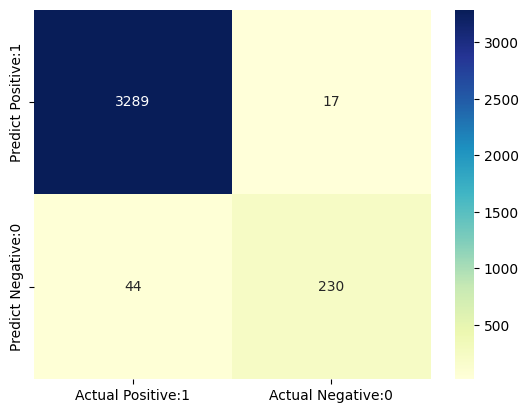

In [83]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [84]:
#Classification metrices
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3306
           1       0.93      0.84      0.88       274

    accuracy                           0.98      3580
   macro avg       0.96      0.92      0.94      3580
weighted avg       0.98      0.98      0.98      3580



In [85]:
#Classification accuracy
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [86]:
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.9830


In [87]:
#Classification error
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.0170


In [88]:
#Precision
precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))
#Recall
recall = TP / float(TP + FN)
print('Recall or Sensitivity : {0:0.4f}'.format(recall))
#Specificity
specificity = TN / (TN + FP)
print('Specificity : {0:0.4f}'.format(specificity))

Precision : 0.9949
Recall or Sensitivity : 0.9868
Specificity : 0.9312


In [89]:
#True Positive Rate
true_positive_rate = TP / float(TP + FN)
print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))
#False Positive Rate
false_positive_rate = FP / float(FP + TN)
print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

True Positive Rate : 0.9868
False Positive Rate : 0.0688


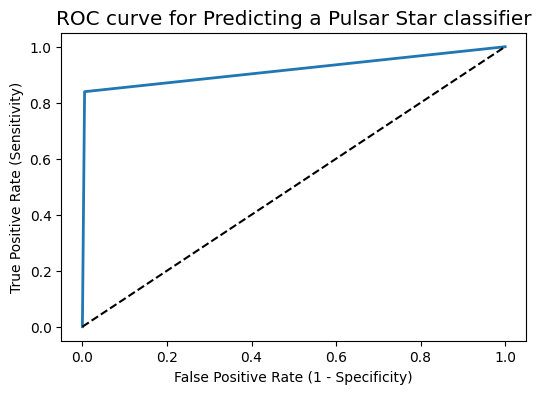

In [90]:
#ROC-AUC
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Predicting a Pulsar Star classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

In [91]:
from sklearn.metrics import roc_auc_score
ROC_AUC = roc_auc_score(y_test, y_pred_test)
print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.9171


In [92]:
from sklearn.model_selection import cross_val_score
Cross_validated_ROC_AUC = cross_val_score(linear_svc, X_train, y_train, cv=10, scoring='roc_auc').mean()
print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Cross validated ROC AUC : 0.9756


In [93]:
#Stratified k-fold Cross Validation with shuffle split
from sklearn.model_selection import KFold
kfold=KFold(n_splits=5, shuffle=True, random_state=0)

#Stratified k-Fold Cross Validation with shuffle split with rbf kernel
rbf_svc=SVC(kernel='rbf')
rbf_scores = cross_val_score(rbf_svc, X, y, cv=kfold)

In [94]:
print('Stratified Cross-validation scores with rbf kernel:\n\n{}'.format(rbf_scores))
print('Average stratified cross-validation score with rbf kernel:{:.4f}'.format(rbf_scores.mean()))

Stratified Cross-validation scores with rbf kernel:

[0.97849162 0.97011173 0.97318436 0.9709416  0.96982397]
Average stratified cross-validation score with rbf kernel:0.9725


In [95]:
#Stratified k-Fold Cross Validation with shuffle split with linear kernel
linear_svc=SVC(kernel='linear')
linear_scores = cross_val_score(linear_svc, X, y, cv=kfold)

In [96]:
print('Stratified cross-validation scores with linear kernel:\n\n{}'.format(linear_scores))
print('Average stratified cross-validation score with linear kernel:{:.4f}'.format(linear_scores.mean()))

Stratified cross-validation scores with linear kernel:

[0.98296089 0.97458101 0.97988827 0.97876502 0.97848561]
Average stratified cross-validation score with linear kernel:0.9789


In [97]:
#Stratified k-Fold Cross Validation with shuffle split with polynomial kernel
poly_svc=SVC(kernel='linear')
poly_scores = cross_val_score(poly_svc, X, y, cv=kfold)

In [98]:
print('Stratified cross-validation scores with polynomial kernel:\n\n{}'.format(poly_scores))
print('Average stratified cross-validation score with polynomial kernel:{:.4f}'.format(poly_scores.mean()))

Stratified cross-validation scores with polynomial kernel:

[0.98296089 0.97458101 0.97988827 0.97876502 0.97848561]
Average stratified cross-validation score with polynomial kernel:0.9789


In [99]:
#Hyperparameter Optimization using GridSearch CV
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

svc=SVC()
parameters = [ {'C':[1, 10, 100, 1000], 'kernel':['linear']},
               {'C':[1, 10, 100, 1000], 'kernel':['rbf'], 'gamma':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]},
               {'C':[1, 10, 100, 1000], 'kernel':['poly'], 'degree': [2,3,4] ,'gamma':[0.01,0.02,0.03,0.04,0.05]}
              ]
grid_search = GridSearchCV(estimator = svc,
              param_grid = parameters,
              scoring = 'accuracy',
              cv = 5,
              verbose=0)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000],
                          'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                    0.9],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'degree': [2, 3, 4],
                          'gamma': [0.01, 0.02, 0.03, 0.04, 0.05],
                          'kernel': ['poly']}],
             scoring='accuracy')

In [100]:
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))
print('GridSearch CV score on test set: {0:0.4f}'.format(grid_search.score(X_test, y_test)))

GridSearch CV best score : 0.9793


Parameters that give the best results : 

 {'C': 10, 'gamma': 0.3, 'kernel': 'rbf'}


Estimator that was chosen by the search : 

 SVC(C=10, gamma=0.3)
GridSearch CV score on test set: 0.9835
